# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='' width="700" />

<img src='https://phionashtours.com/wp-content/uploads/2022/04/hotel-booking.jpg' width="900">

> **Problem Background:** The idea is to build a prediction model that can successfully predict booking cancellations to help the large chain of international hotels to respond to booking cancellations.

> **Key Stakeholders:** Hotel Management staff, Investors and Stakeholders, Customers

> **Motivation:** Insufficient occupancy is causing a major concern for many hotels and resorts. Now a days, hotels market  industry has become so competative that a customer has many options available to make their choices. Therefore, the hotel operators are coming up with initiatives like No deposit bookings, full refund cancellations, one day cancellation policy, etc to stay in the business. These initiatives have inturn raised the booking cancellation rates, causing a decline in hotel's net revenue.  

> **Benefits:** Hotel owners and management staff can utilize this model to predict the booking cancellations based on currect demand. This model can help the management minimising their maintenance costs and manage their workforce. This model can also help in setting up a standard to allow overbookings by prediciting the possibilities of cancellation.

> **Performance:** Assesment should be based on the higer accuracy of the prediction and the fewer no of false negatives (model suggests no cancellation, but booking cancelled)


* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [52]:
import pandas as pd
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics


# Notebook specific settings:
pd.set_option("display.max_columns", None)
pd.options.display.max_rows = 4000
%matplotlib inline

In [53]:
# Custom function below is used to display performance measures
def perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    return result

# 3. Data Exploration <a class="anchor" id="data-prep"></a>
* [Go to Top](#table-of-content)

- [X] [Initial Evaluation](#initial-evaluation)
- [X] [Data Cleanup - duplicates, missing values](#missing-values)
- [X] [Outlier Detection & Treatment](#outliers)
- [X] [Feature Selection](#feature-selection)
- [X] [Data Partitioning](#data-split)
- [X] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a><br>
> - **Response Variable:** is_canceled (1 if cancelled, 0 otherwise)<br><br>
> - **Explanatory Variables:** 'hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',  'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests'. <br><br>
>[Go to Data Prep Outline](#data-prep)

In [54]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

>**Data Type:**<br><br>
> **Numerical** - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests <br>

> **Categorical** - hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date <br>

> **Note:** There are no misclassified variables. We can proced with next data cleanup steps - handling duplicates and missing values


> **Data Cleanup - Eliminating duplicates, Handle missing values** <a class="anchor" id="missing-values"></a><br>

In [55]:
print('No of records before removing duplicates:', len(df))
print('No of records after removing duplicates:', len(df.drop_duplicates()))

No of records before removing duplicates: 119390
No of records after removing duplicates: 87138


In [36]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

> **Observational summary on missing values**
> - **Children & Country** - Missing values in these columns are comparitively very few and filling these records wouldn't make any significance on the large data set we have. So dropping all the records with missing values in Children & Country <br>
> - **Company & Agent** - Dropping both these columns as the missing values in these columns are comparitively very high and filling all these records would be cumbersome and may introduce unwanted bias on the performance of our model.<br>

In [56]:
#drop records with missing values in country and children column
#drop the entire column company and agent 
df = df[df.country.notnull()]
df1 = df[df.children.notnull()]
df2 = df1.drop(columns =['company','agent'])

In [8]:
#check for any missing values
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

> **Outlier Detection & Treatment** <a class="anchor" id="outliers)"></a><br>

<AxesSubplot:xlabel='lead_time'>

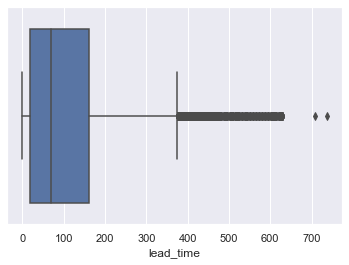

In [126]:
#boxplot for 'lead_time' to check for any outliers
sns.boxplot(df2['lead_time'])

> **Observational summary on Outliers**
> - It's evident from the boxplot that there are outliers in the 'lead_time' column of the data set. Bookings with 'lead_time' over an year doesn't really make sense to me, as anything can happen in span of an year and plans do change overtime. So, bookings with 'lead_time' > 350 isn't good indicator for our prediction model and hence dropping all the records with lead_time more than 350

In [57]:
# Remove outliers based on thresholds described (lead_time < 350)
print('Number of records BEFORE outlier handling:', len(df2))
df3 = df2[df2['lead_time'] < 350]
print('Number of records AFTER outlier handling:', len(df3))

Number of records BEFORE outlier handling: 118898
Number of records AFTER outlier handling: 114974


> **Feature Selection** <a class="anchor" id="feature-selection)"></a><br>


> **Correlations to spot the most promising features** 
> - Step 1: Find the features which are highly correlated with the target variable
> - Step 2: Find if any of features identifies in step 1 are highly correlated with each other

> **Note to myself:** Decision Trees, Randon Forests and Nueral Nets have automatic feature selection. Therefore, we start training the data using df3 when we bulid these models in this notebook.

<AxesSubplot:xlabel='is_canceled'>

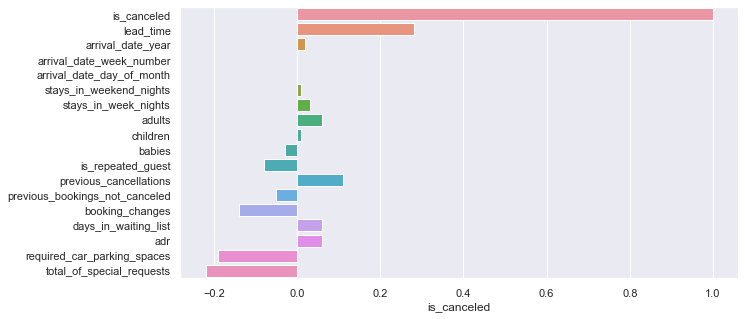

In [128]:
#Step 1: Identify correlation with the target variable
a = df3.corr()[['is_canceled']].round(2)
sns.set(rc= {'figure.figsize':(10,5)})
sns.barplot(x=a.is_canceled[0:],y=a.index[0:],data=a, orient='h')

> **Interpreting Correlation barplot:** <br>
> Below features most correlated with target variable:
> - Lead Time(+): 
> - adults(+): 
> - Previous Cancellation(+)
> - Days in waiting list(+)
> - adr(+)
> - required car parking(-)
> - total_of_special_request(-)
> - booking_changes(-): More changes 
> - agent(-)
> - is repeated guest(-): Repeated guests are less likely to cancel bookings in a particular hotel.
> - previous bookings_not cancelled(-)<br>
 **Decision:** Drop all the features which are not correlated or least correlated with the target variable.<br>

>Let's proceed to Step 2 and see if any of these features are highly correlated with each other

In [129]:
#Step 2: Finding highly correlated features with each other from Step 1
df3[['lead_time','adults','previous_cancellations','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','booking_changes','is_repeated_guest','previous_bookings_not_canceled']].corr().round(2)

,lead_time,adults,previous_cancellations,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,booking_changes,is_repeated_guest,previous_bookings_not_canceled
lead_time,1.00,0.13,0.10,0.18,-0.02,-0.11,-0.06,0.01,-0.13,-0.08
adults,0.13,1.00,-0.01,-0.02,0.24,0.02,0.13,-0.05,-0.15,-0.11
previous_cancellations,0.10,-0.01,1.00,0.01,-0.06,-0.02,-0.05,-0.03,0.08,0.15
days_in_waiting_list,0.18,-0.02,0.01,1.00,-0.04,-0.03,-0.09,-0.01,-0.02,-0.01
adr,-0.02,0.24,-0.06,-0.04,1.00,0.06,0.16,0.02,-0.14,-0.07
required_car_parking_spaces,-0.11,0.02,-0.02,-0.03,0.06,1.00,0.08,0.06,0.08,0.05
total_of_special_requests,-0.06,0.13,-0.05,-0.09,0.16,0.08,1.00,0.05,0.01,0.04
booking_changes,0.01,-0.05,-0.03,-0.01,0.02,0.06,0.05,1.00,0.01,0.01
is_repeated_guest,-0.13,-0.15,0.08,-0.02,-0.14,0.08,0.01,0.01,1.00,0.42
previous_bookings_not_canceled,-0.08,-0.11,0.15,-0.01,-0.07,0.05,0.04,0.01,0.42,1.00


> **Observations from Step 2:**<br>
> Below are highly correlated features with each other from Step 1
> - 'previous_bookings_not_canceled'  and  'is_repeated_guest'
> - 'adr' and 'adult'<br>
 **Decision:** Keep 'is_repeated_guest' and dropping 'previous_bookings_not_canceled' as the later is comparitevely more correlated with target variable.<br>


In [130]:
#drop all the features as decided in Step 1 and Step 2 above
df4 = df3.drop(['arrival_date_year','arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights','children', 'babies','previous_bookings_not_canceled','adr'
             ], axis=1)

>**Let's go back to assessing the Categorical Variables:**<br>

>**Variables that seem to matter**--<br>
> 1. **hotel:**  Type of hotel and its reviews might influence the booking cancellations <br>
> 2. **arrival_date_month:**  Booking cancellation could be more in offseasonal months <br>
> 3. **distribution_channel:**  Bookings through corporate and travel agents/operators are more likely to cancel.<br>
> 4. **deposit_type:**  Bookings with deposit_type 'Refundable' and 'No Deposit' might have a high percentage of cancellations<br>
> 5. **customer_type:** Customers with bookings not associated to other transient booking or not part of a group are more likely to cancel
<br>

>**Variables that doesn't seem to matter**--<br>
> 1. **meal:** Customer has an idea of the meal before. Once the booking is done, it doesn't seem to matter much.<br>
> 2. **market_segment:**<br>
> 3. **reserved_room_type:** Customers might not have a visual on the ambience of the room they reserved and they'll get to know the difference in reserved room and assigned room only at the time of check-in. Cancelling the booking at the time of check-in is not very usual.<br>
> 4. **assigned_room_type:** Same reason as 'reserved_room_type'

In [131]:
#drop the Categorical Variables that doesn't seem to matter
df5 = df4.drop(['meal','market_segment','reserved_room_type','assigned_room_type'], axis=1)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114974 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   hotel                        114974 non-null  object
 1   is_canceled                  114974 non-null  int64 
 2   lead_time                    114974 non-null  int64 
 3   arrival_date_month           114974 non-null  object
 4   adults                       114974 non-null  int64 
 5   country                      114974 non-null  object
 6   distribution_channel         114974 non-null  object
 7   is_repeated_guest            114974 non-null  int64 
 8   previous_cancellations       114974 non-null  int64 
 9   booking_changes              114974 non-null  int64 
 10  deposit_type                 114974 non-null  object
 11  days_in_waiting_list         114974 non-null  int64 
 12  customer_type                114974 non-null  object
 13  required_car_p

> **Observations after dropping the unnecessary features**
> - Below are the final set of features variables selected manually for builing a model(Logistic and KNN)- Remember, Decision trees, Random Forest and NueralNets make the feature selection automatically <br>
>> 'hotel', 'lead_time', 'arrival_date_month', 'adults', 'country', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests'.
> - Encode the below feature variables to categorical variables before applying the model <br>
>>  'hotel', 'arrival_date_month', 'country', 'distribution_channel', 'deposit_type', 'customer_type'.

In [132]:
# Keep top 5 Makes and label all the rest as "OTHER"
keep = df5['country'].value_counts().index[:5]
df5['country'] = np.where(df5['country'].isin(keep), df5['country'], 'Others')

In [133]:
# Encode the above feature variables and convert to dummies
cat_vars = ['hotel','arrival_date_month','country',
            'distribution_channel','deposit_type','customer_type'
           ]
# Loop over categorical vars and encode each one
for var in cat_vars:
    df5[var] = df5[var].astype("category")

df5 = pd.get_dummies(df5,columns=cat_vars, prefix_sep='_', drop_first=True)

> **Data Partitioning** <a class="anchor" id="data-split"></a><br>

In [134]:
target = ['is_canceled']

X = df5.drop(target,axis=1)
y = df5[target]

# Split data
X_train_mm,X_test_mm,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

> **Data Normalization** <a class="anchor" id="normalization"></a><br> 


In [135]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train_mm)
X_train = mm_scaler.transform(X_train_mm)
X_test = mm_scaler.transform(X_test_mm)

>**Baseline or 'naive' benchmark:**<br>
> - Compute a baseline using an understanding of the proportion of records in the original data that are assigned to each class

In [136]:
print('Count of booking cancellation and non cancellation:')
print(y_train.value_counts())
print('\n')
print('%.2f percent of the bookings were cancelled' %(y_train.mean()*100))
print('%.2f percent of the bookings were not cancelled' %(100-(y_train.mean()*100)))

Count of booking cancellation and non cancellation:
is_canceled
0              51415
1              29066
dtype: int64


36.12 percent of the bookings were cancelled
63.88 percent of the bookings were not cancelled


> **Interpretation of Baseline model:**
> - We go right 64% of time, when we assign every test record to the most prevalent class (booking not cancelled in this case). 

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [X] [Decision Tree Classifier](#third-model)
- [X] [Random Forest Classifier](#fourth-model)
- [X] [MLP Classifier](#fifth-model)



* [Go to Top](#table-of-content)

<br>**KNN classification Model**<br><br> <a class="anchor" id="first-model"></a>

In [137]:
# train a classifier for different values of k
results = []

for k in range (1,25):
  if k % 2 != 0:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn_model.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class
                    )
                   }
                  )

pd.DataFrame(results)

,k,accuracy
0,1,0.804105
1,3,0.813759
2,5,0.816195
3,7,0.815586
4,9,0.815267
5,11,0.816398
6,13,0.814716
7,15,0.815963
8,17,0.814455
9,19,0.812484


> **Choosing the appropriate K value in KNN classification** <br>
>1. Let's choose the K value based on the accuracy of the model. Low K value tends to overfit and high K value tends to underfit. So K value should neither be too high nor too low. For this reason we are not choosing K value as 7, even though the accuracy is more.
>3. For any value of K <= 19, accuarcy remains almost constant at 81% and then starts decreasing as K increases. Therefore, we choose the K value as 19 for our KNN model.

In [138]:
#Re-Run the KNN classification model with K = 19

knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=19)

In [139]:
y_train_pred_class= knn_model.predict(X_train)
y_test_pred_class = knn_model.predict(X_test)

print('Train Accuracy:', metrics.accuracy_score(y_train, y_train_pred_class).round(3))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred_class).round(3))

Train Accuracy: 0.831
Test Accuracy: 0.812


In [140]:
#Cross Validation with KFold = 5
scores = cross_val_score(knn_model, X_train, y_train.values.ravel(), cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))

Average cross validation score: 0.809


> **Observations on KNN model:** Train accuracy, Test accuracy and cross validation scores are pretty close. So, no major chance of overfitting.

In [141]:
perf_measures(knn_model,X_test,y_test)

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.0,12379,0,22114,0,0.359,1.000,0.36
1,0.1,12049,8118,13996,330,0.463,0.973,0.58
2,0.2,11275,12823,9291,1104,0.548,0.911,0.70
3,0.3,10322,16150,5964,2057,0.634,0.834,0.77
4,0.4,9349,18324,3790,3030,0.712,0.755,0.80
5,0.5,8324,19701,2413,4055,0.775,0.672,0.81
6,0.6,7156,20823,1291,5223,0.847,0.578,0.81
7,0.7,5992,21525,589,6387,0.910,0.484,0.80
8,0.8,5146,21901,213,7233,0.960,0.416,0.78
9,0.9,4381,22070,44,7998,0.990,0.354,0.77


<br>**Logistic Model**<br><br> <a class="anchor" id="second-model"></a>

In [142]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [143]:
y_train_pred_class= model.predict(X_train)
y_test_pred_class = model.predict(X_test)

print('Train Accuracy:', metrics.accuracy_score(y_train, y_train_pred_class).round(3))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred_class).round(3))

Train Accuracy: 0.779
Test Accuracy: 0.776


In [144]:
#Cross Validation with KFold = 5
scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))

Average cross validation score: 0.778


> **Observations on Logistic model:** Train accuracy, Test accuracy and cross validation scores are pretty close. So, no major chance of overfitting.

In [145]:
perf_measures(model,X_test,y_test)

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.0,12379,0,22114,0,0.359,1.000,0.36
1,0.1,12133,5730,16384,246,0.425,0.980,0.52
2,0.2,11209,11208,10906,1170,0.507,0.905,0.65
3,0.3,9843,15632,6482,2536,0.603,0.795,0.74
4,0.4,8021,18659,3455,4358,0.699,0.648,0.77
5,0.5,6548,20235,1879,5831,0.777,0.529,0.78
6,0.6,5430,21330,784,6949,0.874,0.439,0.78
7,0.7,4583,21850,264,7796,0.946,0.370,0.77
8,0.8,4002,22047,67,8377,0.984,0.323,0.76
9,0.9,3640,22101,13,8739,0.996,0.294,0.75


> **Logistic model with Regularization - Ridge and Lasso Regression**
> - Although the logistic model doesn't seem to overfit the train data as the prediction variance is quite low. Let's explore if we can improve the accuracy of the above logistic model using Ridge and Lasso Regression analysis. 

> Note: Ridge and Lasso model nullifies the effect of least significant features of the data set by introducing a penality term. So, let's start with start with df3 (dataframe after handling the outliers above) and skip to data Normalization and train-test-split, bypassing the feature selection step.

In [39]:
# Keep top 5 Country and label all the rest as "OTHER"
keep = df3['country'].value_counts().index[:5]
df3['country'] = np.where(df3['country'].isin(keep), df3['country'], 'Others')

C:\Users\vreddy20\AppData\Local\Temp\ipykernel_2780\580875065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['country'] = np.where(df3['country'].isin(keep), df3['country'], 'Others')


In [40]:
# Flag all categorical variables and convert to dummies
cat_vars = ['hotel','arrival_date_month','country',
            'distribution_channel','deposit_type','customer_type','meal','market_segment','reserved_room_type','assigned_room_type'
           ]
# Loop over categorical vars and encode each one
for var in cat_vars:
    df3[var] = df3[var].astype("category")

df3 = pd.get_dummies(df3,columns=cat_vars, prefix_sep='_', drop_first=True)

C:\Users\vreddy20\AppData\Local\Temp\ipykernel_2780\3359867818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[var] = df3[var].astype("category")
C:\Users\vreddy20\AppData\Local\Temp\ipykernel_2780\3359867818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[var] = df3[var].astype("category")
C:\Users\vreddy20\AppData\Local\Temp\ipykernel_2780\3359867818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [148]:
X = df3.drop(['is_canceled'],axis=1).copy()
y = df3['is_canceled']

# Split data
X_train_mm,X_test_mm,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train_mm)
X_train = mm_scaler.transform(X_train_mm)
X_test = mm_scaler.transform(X_test_mm)

In [149]:
lr_model = LogisticRegression()

# Parameters we want to explore/evaluate
parameters = {
    'penalty':['l1','l2'],
    'C': np.logspace(-4,4,10),
    'solver': ['newton-cg','lbfgs','liblinear']
}

In [150]:
# Setting up a grid search to find the Best Hyperparameters
clf = GridSearchCV(lr_model,
                   param_grid = parameters,
                   scoring = 'accuracy',
                   cv = 10
                  )

In [151]:
best_lr = clf.fit(X_train,y_train.values.ravel())

In [152]:
print("Best Hyperparameters :", best_lr.best_params_)
print("Accuracy :", best_lr.best_score_)

Best Hyperparameters : {'C': 1291.5496650148827, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.808501353970845


> From the grid search above, we have the best Hyperparameters as **'C':** 1291.54434690031882, **'penalty':** 'l2', **'solver':** 'liblinear'
> - Let's train the model using the above Hyperparameters and check for accuarcy

In [153]:
ridge_lr = LogisticRegressionCV(penalty='l1', Cs=2,solver='liblinear')
ridge_lr.fit(X_train,y_train.values.ravel())

LogisticRegressionCV(Cs=2, penalty='l1', solver='liblinear')

In [154]:
y_train_pred_class= ridge_lr.predict(X_train)
y_test_pred_class = ridge_lr.predict(X_test)

print('Train Accuracy:', metrics.accuracy_score(y_train, y_train_pred_class).round(3))
print('Test Accuracy:', metrics.accuracy_score(y_test, y_test_pred_class).round(3))

Train Accuracy: 0.809
Test Accuracy: 0.805


> **Observation**: The accuracy of Logistic model with regularization has slightly increased but is not significant enough.


<br>**Decision Tree Classifier**<br><br> <a class="anchor" id="Third-model"></a>

> **Note:** Decision Trees, Random Forest and Neural Nets are capable enough to select the best features automatically and moreover, Data Normalization is not required for these model. Therefore, we start with df3 (dataframe after handling the outliers above) and skip to train-test-split, bypassing the feature selection and Data normalization steps 

In [41]:
X = df3.drop(['is_canceled'],axis=1).copy()
y = df3['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

> **Pruning:**
> - Decision Trees often overfit the train data - So Prune the Decision Trees
> - Pruning in 2 steps 
>>  - Cost complexity 
>>  - Specify max depth, min_samples_split, min_impurity_decrease

In [157]:
#Pruning using cost complexity function
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

> Setting up a for loop to pick the best alpha value (penality term) in pruning back the decision tree

In [158]:
dts = []

for ccp_alpha in ccp_alphas[0::40]:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train,y_train)
    dts.append(dt)

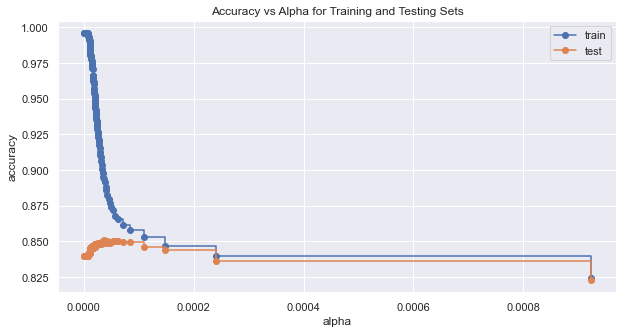

In [159]:
train_scores = [dt.score(X_train,y_train) for dt in dts]
test_scores = [dt.score(X_test,y_test) for dt in dts]

fix, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas[0::40], train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[0::40], test_scores, marker='o', label="test",drawstyle='steps-post')
ax.legend()
plt.show()

> Set up a grid search to find the best values for max depth, min_samples_split, min_impurity_decrease

In [160]:
# grid search to find the best values hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005]
}

In [161]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                          param_grid, 
                          cv=5,
                          n_jobs=-1  #used to marshall all available CPUs
                         )
gridSearch.fit(X_train,y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8424969642294089
Initial parameters:  {'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 60}


> Now, let's scale down the search a further based on the above observations.

In [21]:
# Adapt grid based on findings in last cell
param_grid = {
    'max_depth': list(range(15,30)),
    'min_samples_split': list(range(60,80)),
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004]
}

In [22]:
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                          param_grid, 
                          cv=5,
                          n_jobs=-1  #used to marshall all available CPUs
                         )
gridSearch.fit(X_train,y_train)

print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

Improved score:  0.8434040187958415
Improved parameters:  {'max_depth': 19, 'min_impurity_decrease': 0.0001, 'min_samples_split': 60}


> **Observation:** Final Values of the best hyperparameters as per the above analysis <br>
> - 'max_depth': 20, 'min_impurity_decrease': 0, 'min_samples_split': 40  and 'ccp_alpha'=0.0008

In [43]:
#Fit the model using above hyperparameters
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0008, min_samples_split=60, max_depth=19, min_impurity_decrease = 0.0001)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0008, max_depth=19,
                       min_impurity_decrease=0.0001, min_samples_split=60,
                       random_state=0)

In [45]:
y_pred_prob = dt.predict_proba(X_test)[:,1]
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
confusion=confusion_matrix(y_test,y_pred_class)

print('Accuracy: ', metrics.accuracy_score(y_test,y_pred_class).round(2))

Accuracy:  0.83


In [166]:
scores = cross_val_score(dt, X_train, y_train.values.ravel(), cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))

Average cross validation score: 0.830


> **Observations on Decision Tree model:** Test accuracy and cross validation scores are pretty close. So, no major chance of overfitting.

In [46]:
perf_measures(dt,X_test,y_test)

C:\Users\vreddy20\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.0,12441,0,22052,0,0.361,1.000,0.36
1,0.1,11889,11136,10916,552,0.521,0.956,0.67
2,0.2,10929,15659,6393,1512,0.631,0.878,0.77
3,0.3,10218,17351,4701,2223,0.685,0.821,0.80
4,0.4,9088,19359,2693,3353,0.771,0.730,0.82
5,0.5,8646,19831,2221,3795,0.796,0.695,0.83
6,0.6,8418,20020,2032,4023,0.806,0.677,0.82
7,0.7,4321,22001,51,8120,0.988,0.347,0.76
8,0.8,4279,22021,31,8162,0.993,0.344,0.76
9,0.9,4258,22021,31,8183,0.993,0.342,0.76


Even after the estimation best hyperparameters for the Decision tree, the maximun accuracy we can achieve from this model is 83% at 0.5 threshold. Let's figure out if we can improve this by creating a random forest

<br>**Random_Forest_Classifier**<br><br> <a class="anchor" id="Fourth-model"></a>

In [47]:
rf = RandomForestClassifier(n_estimators=100, max_depth=19, min_samples_split=60,
                               max_features=20, min_impurity_decrease = 0.0001, random_state=0, ccp_alpha=0.0008)

rf.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0008, max_depth=19, max_features=20,
                       min_impurity_decrease=0.0001, min_samples_split=60,
                       random_state=0)

> Since we have already computed the best hyperparameters for a decision tree model, I'm using the same hyperparameters for Random forest model.


In [49]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
confusion=confusion_matrix(y_test,y_pred_class)

print('Accuracy: ', metrics.accuracy_score(y_test,y_pred_class).round(2))

Accuracy:  0.83


In [171]:
scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))

Average cross validation score: 0.835


> **Observations on Random Forest model:** Test accuracy and cross validation scores are pretty close. So, no major chance of overfitting.

In [50]:
perf_measures(rf,X_test,y_test)

C:\Users\vreddy20\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.0,12441,0,22052,0,0.361,1.000,0.36
1,0.1,12357,7501,14551,84,0.459,0.993,0.58
2,0.2,11695,13466,8586,746,0.577,0.940,0.73
3,0.3,10598,17044,5008,1843,0.679,0.852,0.80
4,0.4,9304,19345,2707,3137,0.775,0.748,0.83
5,0.5,8452,20297,1755,3989,0.828,0.679,0.83
6,0.6,7300,21043,1009,5141,0.879,0.587,0.82
7,0.7,4385,22031,21,8056,0.995,0.352,0.77
8,0.8,4191,22042,10,8250,0.998,0.337,0.76
9,0.9,3922,22048,4,8519,0.999,0.315,0.75


In [174]:
#set up a grid search
param_grid = {
    'max_depth': list(range(10,30)),
    'min_samples_split': list(range(40,50)),
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003]
}

In [175]:
gridSearch = GridSearchCV(RandomForestClassifier(random_state=1), 
                          param_grid, 
                          cv=5,
                          n_jobs=-1  #used to marshall all available CPUs
                         )
gridSearch.fit(X_train,y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8367937827158933
Initial parameters:  {'max_depth': 18, 'min_impurity_decrease': 0.0001, 'min_samples_split': 41}


> **Observation:** Best Hyperparameter values obtained are 'max_depth': 19, 'min_impurity_decrease': 0.0001, 'min_samples_split': 47. <br>
> - Now let's fit the Random Forest Model with the Hyperparameters calculated above

In [51]:
rf = RandomForestClassifier(n_estimators=100, max_depth=18, min_samples_split=41,
                               max_features=20, min_impurity_decrease = 0.0001, random_state=0, ccp_alpha=0.0008)

rf.fit(X_train,y_train)

y_pred_prob = rf.predict_proba(X_test)[:,1]
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
confusion=confusion_matrix(y_test,y_pred_class)

print(metrics.accuracy_score(y_test,y_pred_class).round(2))

0.83


> **My Conclusion:** Accuracy of both the Random Forests (one with hyperparameters estimated for a decision tree and other with hyperparameters estimated from grid search) are same.Therfore, the best hyperparameters estimated for a decision tree will also be the best hyperparameters for a Random Forest


<br>**MLP_Classifier**<br><br> <a class="anchor" id="Fifth-model"></a>

In [177]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [178]:
parameters = {'solver': ['lbfgs'], 'max_iter': [300, 400], 'alpha': 10.0 ** -np.arange(1, 3), 'hidden_layer_sizes':np.arange(20, 30)}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [179]:
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.best_params_)

0.6396168039661535
{'alpha': 0.01, 'hidden_layer_sizes': 28, 'max_iter': 300, 'solver': 'lbfgs'}


In [180]:
mlp_pred = mlp.predict(X_test)
print("Train score: {:.3f}".format(mlp.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test, y_test)))

Train score: 0.827
Test accuracy: 0.828


In [181]:
scores = cross_val_score(mlp, X_train, y_train.values.ravel(), cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))

Average cross validation score: 0.803


In [184]:
perf_measures(mlp,X_test,y_test)

,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.0,12441,0,22052,0,0.361,1.000,0.36
1,0.1,12115,10287,11765,326,0.507,0.974,0.65
2,0.2,11636,13889,8163,805,0.588,0.935,0.74
3,0.3,11007,16211,5841,1434,0.653,0.885,0.79
4,0.4,10193,18004,4048,2248,0.716,0.819,0.82
5,0.5,9279,19265,2787,3162,0.769,0.746,0.83
6,0.6,8142,20289,1763,4299,0.822,0.654,0.82
7,0.7,6902,21009,1043,5539,0.869,0.555,0.81
8,0.8,5814,21524,528,6627,0.917,0.467,0.79
9,0.9,4878,21865,187,7563,0.963,0.392,0.78


> **Summary of Performance Metrics**

> All these models seems to perform better at higher threshold levels, interms of fewer number of False Positives and higher accuracy. So, Let's compare the performance metrics of these models at following threshold levels:

> Threshold Level = 0.6

| Model          	| False Positives | False Negatives | Precision | Accuracy |
|------------------	|-----------------|-----------------|-----------|----------|
| KNN Model         | 1291            | 5223            | 0.84      | 81 %     |
| Logistic Model    | 784             | 6949            | 0.87      | 78 %     |
| Decision Tree Classifier | 2032     | 4023            | 0.80      | 82 %     | 
| Random Forest Classifier | 1009     | 5141            | 0.87      | 82 %     |
| MLP Classifier    | 1763            | 4299            | 0.82      | 82 %     |

> Threshold Level = 0.7

| Model          	| False Positives | False Negatives | Precision | Accuracy |
|------------------	|-----------------|-----------------|-----------|----------|
| KNN Model         | 589             | 6387            | 0.91      | 80 %     |
| Logistic Model    | 264             | 7796            | 0.94      | 77 %     |
| Decision Tree Classifier | 51       | 8120            | 0.98      | 76 %     | 
| Random Forest Classifier | 21       | 8056            | 0.99      | 77 %     |
| MLP Classifier    | 1043            | 5539            | 0.86      | 81 %     |


> Threshold Level = 0.8

| Model          	| False Positives | False Negatives | Precision | Accuracy |
|------------------	|-----------------|-----------------|-----------|----------|
| KNN Model         | 213          | 7233        | 0.96    | 78 %  |
| Logistic Model    | 67           | 8377        | 0.98    | 76 %  |
| Decision Tree Classifier | 31    | 8162        | 0.99    | 76 % | 
| Random Forest Classifier | 10    | 8250        | 0.99    | 76 % |
| MLP Classifier    | 528          | 6627        | 0.91    | 76 %  |

> **Final Observation - Pick a Winning Model**

> **Threshold Level = 0.6** <br>
> Logistic model has least no of False Positives with highest Precision <br>
> Random Forest has the highest accuracy and second least number of False Positives <br>
> **Winning Model:** Random Forest is the winning model at this threshold level with highest accuarcy and comparitevely fewer False Positives <br>

> **Threshold Level = 0.7** <br>
> Random Forest has least no of False Positives with highest Precision <br>
> MLP classifiers has better accuracy than Random Forest, but comparitively more number of False Positives <br>
> **Winning Model:** Random Forest is the winning model at this threshold level with reasonable accuarcy and comparitevely fewer False Positives <br>

> **Threshold Level = 0.8** <br>
> Random Forest and Decision Tree has least no of False Positives with highest Precision <br>
> MLP classifier has better accuracy than Random Forest, but comparitively more number of False Positives <br>
> **Winning Model:** Random Forest is the winning model at this threshold level with reasonable accuarcy and fewer False Positives <br>

# General Inference and Recommendations

> **General Inference**


> FP: Booking NOT cancelled, but model predicted cancelled. <br>
> FN: Booking cancelled, but model predicted NOT cancelled. <br>

>- **Booking cancelled:** 1    <br> 
>- **Booking Not Cancelled:** 0

> As we are builing this model for Hotels, False Positives in the prediction mode are the costliest mistakes, i.e, when the booking is cancelled, but the model predicts otherwise. Hence, we need to look for the Precision values in the performace measures.

> **Potential Issues with False Positives (FP):**
> 1. Increased customer dissatisfaction due to booking precancellations
> 2. Hefty payback in form of reimbursement
> 3. Loss of trust and reputation among the customers resulting in slacking of the business
> 4. Potential Lawsuits from travel operators and agents

> **Potential Issues with False Negatives (FN):**
> 1. Reduced profits due to low occupancy
> 2. Increased Maintenance and labor costs
> 3. Loss of net revenue due to lack of contingency


> **Recommendations** <br>
> 1. This models helps in predicting the booking cancellation based on the seasonal demand.<br>
> 2. This model can help the hotel management to plan and manage their labor and maintenance cost during the off season when the booking cancellation are expected to be more. <br>
> 3. This model helps setting up a dynamic pricing model based on demand and possibility of cancellations
> 4. This model helps in building the customer satisfaction, there by increasing the net revenue in long run.
> 5. This model can also help in setting up a standard to allow overbookings by prediciting the possibilities of cancellation.

> **Concern with the data:** <br> 
> 1. Providing the price of the hotel/resort would have added more value to this model. Customers tend to cancel their current booking when then found alternatives with lesser price. <br>